In [53]:
import os
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [96]:
class Args:
    def __init__(self):
        self.log_root = 'log'
        self.incremental = True # If true we don't retrain the model every step
        self.dataset = 'branin' # This is branin or ackley
        
        self.re_calib = False
        self.re_bias_f = False
        self.re_bias_y = False

        # Modeling parameters
        self.model = 'small'
        self.learning_rate = 1e-3
        self.num_bins = 0
        self.knn = 10

        # Run related parameters
        self.num_iter = 1000
        self.run_label = 0
        self.num_run = 10
        self.flow_skip = 1

5
6
5


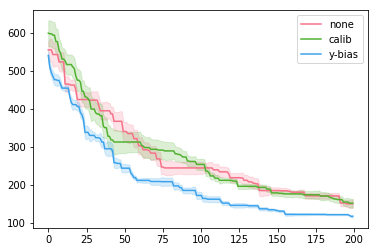

In [98]:
palette = sns.color_palette('husl', 3)

names = ['none', 'calib', 'y-bias']
for rep in range(3):
    result_arr = []
    for run_label in range(15):
        args = Args()
        args.run_label = run_label
        if rep == 1:
            args.re_calib = True
        if rep == 2:
            args.re_bias_y = True
        args.name = '%s/model=%s-%r-False-%r-%r-%r-bin=%d-%d-run=%d' % \
            (args.dataset, args.model, args.incremental, args.re_calib, args.re_bias_f, args.re_bias_y, args.num_bins, args.knn, args.run_label)
        args.log_dir = os.path.join(args.log_root, args.name)
        
        try:
            reader = open(os.path.join(args.log_dir, 'results.txt'))
        except:
            continue
        line = reader.readline().split()
        if len(line) < 300:
            continue
        if line[0][0:5] == 'Start':
            line[0] = line[0][5:]

        ys = [float(item) for item in line]
        min_y = [ys[0]]
        for y in ys[1:]:
            if y < min_y[-1]:
                min_y.append(y)
            else:
                min_y.append(min_y[-1])
        result_arr.append(np.array(min_y))
    print(len(result_arr))
    result_arr = np.stack(result_arr)
    mean = np.median(result_arr[:, 100:], axis=0)
    std = result_arr[:, 100:].std(axis=0) / np.sqrt(result_arr.shape[0])
    plt.plot(range(200), mean, c=palette[rep], label=names[rep])
    plt.fill_between(range(200), mean-std, mean+std, color=palette[rep], alpha=0.2)
plt.legend()
plt.savefig('bo_%s.png' % args.dataset)
plt.show()


In [ ]:
plt.show()